># Exercise Se02_01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split


import sys, os
import random 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from IPython import display, utils



In [2]:
data = pd.read_csv('job_change.csv')
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


### Data Dict

    Education
    1 'Below College'
    2 'College'
    3 'Bachelor'
    4 'Master'
    5 'Doctor'

    EnvironmentSatisfaction
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

    JobInvolvement
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

    JobSatisfaction
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

    PerformanceRating
    1 'Low'
    2 'Good'
    3 'Excellent'
    4 'Outstanding'

    RelationshipSatisfaction
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

    WorkLifeBalance
    1 'Bad'
    2 'Good'
    3 'Better'
    4 'Best'

In [3]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

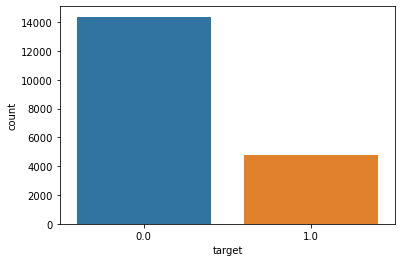

In [4]:
sns.countplot(data.target)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

> ## **Categorical Encoding Practice**

1. Identify categorical and  numerics features for categories. Use "sklearn.compose.make_column_selector" and pandas separatly 
2. Identify Ordinal and nominals
3. Encode Categorical features for all data. Try:
    - Scikit Ordinal Encoder (for ordinals) and Label Encoder (for Nominals)
    - Pandas dummy and Scikit Onehot Encoder
    - Split data to train and test (85-15)and use labelencoder to encode categories
    - Apply Hash encoding to the whole dataset
    - Apply Frequency encoding to the whole dataset
    